<a href="https://colab.research.google.com/github/erickqc2022/2t_354/blob/main/CPU_datset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn 
import statistics as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/pdatos")
!ls

Mounted at /content/drive
cpu.csv  data_t.csv  datos_d.csv  dis2.csv  tiro.csv


In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/pdatos/cpu.csv")
X=data[0:8]
y=data['clase']
#print(y)
print(X)
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.neural_network import MLPClassifier
#model = MLPClassifier(hidden_layer_sizes=(2126,) , max_iter=1000)
#model.fit(X, y)

      a0     a1     a2     a3     a4     a5     a6     a7     a8     a9 clase
0   True  False  False  False   True  False   True   True   True   True    c0
1   True   True  False  False  False   True   True  False   True   True    c0
2  False  False   True   True  False   True  False  False  False  False    c1
3  False   True  False   True   True  False   True   True  False  False    c0
4   True   True  False  False  False   True   True  False  False   True    c0
5   True   True   True   True  False  False   True  False   True   True    c1
6   True   True  False   True   True  False   True  False  False   True    c0
7  False  False   True  False   True   True  False   True  False   True    c1


In [ ]:
#Informacion del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a0      100 non-null    bool  
 1   a1      100 non-null    bool  
 2   a2      100 non-null    bool  
 3   a3      100 non-null    bool  
 4   a4      100 non-null    bool  
 5   a5      100 non-null    bool  
 6   a6      100 non-null    bool  
 7   a7      100 non-null    bool  
 8   a8      100 non-null    bool  
 9   a9      100 non-null    bool  
 10  clase   100 non-null    object
dtypes: bool(10), object(1)
memory usage: 1.9+ KB


In [ ]:
dataset=data.values

In [ ]:
dataset

array([[True, False, False, ..., True, True, 'c0'],
       [True, True, False, ..., True, True, 'c0'],
       [False, False, True, ..., False, False, 'c1'],
       ...,
       [True, False, False, ..., True, True, 'c0'],
       [False, True, True, ..., False, False, 'c0'],
       [True, False, True, ..., False, True, 'c0']], dtype=object)

In [ ]:
X = dataset[:,3:10]
Y = dataset[:,10]

**Elegimos 0 y 1 intencionalmente para ayudar al entrenamiento de nuestra red neuronal.**

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
X_scale

array([[0., 1., 0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 0., 1., 1.],
       [1., 0., 1., 0., 0., 0., 0.],
       [1., 1., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1., 1.],
       [1., 1., 0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1.],
       [0., 0., 1., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1.],
       [1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1.],
       [1., 0., 1., 1., 0., 0., 1.],
       [1., 1., 1., 0., 1., 1., 0.],
       [1., 1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 1.],
       [1., 0., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 1., 1.],
 

Luego, divide tu conjunto de datos de esta manera:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

Dividirá el tamaño de val_and_test en partes iguales para el conjunto de validación y el conjunto de prueba.

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

X_train (10 características de entrada, 70 % del conjunto de datos completo)
X_val (10 características de entrada, 15 % del conjunto de datos completo)
X_test (10 características de entrada, 15 % del conjunto de datos completo)
Y_train (1 etiqueta, 70 % del conjunto de datos completo)
Y_val (1 etiqueta, 15 % del conjunto de datos completo)
Y_test (1 etiqueta, 15 % del conjunto de datos completo)


In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(70, 7) (15, 7) (15, 7) (70,) (15,) (15,)


In [ ]:
print(X,Y)

[[False True False True True True True]
 [False False True True False True True]
 [True False True False False False False]
 [True True False True True False False]
 [False False True True False False True]
 [True False False True False True True]
 [True True False True False False True]
 [False True True False True False True]
 [True False True False True True True]
 [True True True True True False True]
 [False False True True False True False]
 [False True False False False False True]
 [True True True False False False False]
 [True True True False False True False]
 [True True False False False True False]
 [True False False True False False False]
 [False False True True True False True]
 [True False True False True False False]
 [False False False False False True True]
 [True False True True False False True]
 [True True True False True True False]
 [True True False False False False True]
 [True False False False False True True]
 [False True False False False False False]
 [F

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_val,Y_test))

[[5 4]
 [5 1]]


En los  valores en el  ejemplo ( el 5 y el 3)  el 5 se refieren : a los falsos positivos de la clase 1,  arriba a la derecha:  , y el 3 a los falsos negativos  de la clase 2,  abajo izquierda:5)

Clase1=5 Clase2=3 como son casi no son iguales no es de fiabilidad

In [ ]:
import statistics
print(len(Y_test))
#Confusion
print("Lo que se considera aceptable =",5+6/len(Y_test))
def median(l):
    half = len(l) // 2
    l.sort()
    if not len(l) % 2:
        return (l[half - 1] + l[half]) / 2.0
    return l[half]

print("CALCULANDO =",median(X))
print("mediana",np.median(X))

15
Lo que se considera aceptable = 5.4
CALCULANDO = [0.0 0.0 0.5 0.5 1.0 1.0 1.0]
mediana 1.0


**EJERCICIO Nro 3**

In [ ]:
import pandas as pd
from math import log
import operator
dataset = pd.read_csv("/content/drive/MyDrive/pdatos/cpu.csv")
datos=dataset.values
X = datos[:,3:10]
Y = datos[:,10]
list(dataset.columns.values)

['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'clase']

In [ ]:
print(X_scale)

[[0. 1. 0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 0. 1. 1.]
 [1. 0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 1.]
 [1. 1. 0. 1. 0. 0. 1.]
 [0. 1. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1.]
 [0. 0. 1. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1.]
 [1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1.]
 [1. 0. 1. 1. 0. 0. 1.]
 [1. 1. 1. 0. 1. 1. 0.]
 [1. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 1.]
 [1. 0. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1.]
 [0. 1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 0. 0.]
 [1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 0. 1.

La fórmula de cálculo para la entropía es 

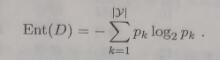

In [ ]:
def calcShannonEnt(dataSet):
         num = len(dataSet) # 
         shannonEnt = 0.0 #Initialize entropy
         labelCounts = {}
         for element in dataset: 
                 label = element [-1] 
                 if label not in labelCounts: 
                    labelCounts[label] = 0
                    labelCounts[label] += 1 #{ 'yes':2,'no':3 }
                    for key in labelCounts:
                      try:
                        p = float(labelCounts[key]/num)
                        shannonEnt = p * log (p, 2)  
                      except ZeroDivisionError:
                        print(".o0")
                    return -shannonEnt

In [ ]:
datosb=X_scale.astype(int)
#print(datosb)
shan = calcShannonEnt(datosb)
print( shan )

0.06643856189774724


**Luego, creamos un método splitDataSet para cortar nuestro conjunto de datos**

In [ ]:
def splitDataSet( dataSet,axis,value ):
    result = []
    for item in dataSet:     #  item:  [1,1,'yes']
        if item[axis] == value:
            r = item[:axis] + item[axis+1:]  # []+[1,'yes'] => r=> [1,'yes']
            result.append(r)
    return result

In [ ]:
datosb=X_scale.astype(int)
result = splitDataSet(datosb,1,1 )
print(result)
result = splitDataSet( datosb,1,0 )
print(result)

[array([0, 1, 1, 1, 1]), array([1, 2, 2, 1, 1]), array([1, 2, 1, 1, 2]), array([1, 0, 1, 0, 1]), array([2, 2, 2, 1, 2]), array([0, 0, 0, 0, 1]), array([2, 1, 1, 1, 1]), array([2, 1, 1, 2, 1]), array([1, 1, 1, 2, 1]), array([2, 1, 2, 2, 1]), array([1, 1, 1, 1, 2]), array([0, 0, 0, 0, 0]), array([2, 2, 2, 1, 1]), array([2, 2, 2, 2, 1]), array([1, 1, 0, 0, 0]), array([0, 0, 0, 0, 0]), array([1, 1, 1, 2, 1]), array([2, 2, 2, 1, 1]), array([2, 1, 2, 2, 2]), array([0, 0, 0, 0, 1]), array([1, 1, 1, 1, 2]), array([2, 1, 1, 2, 1]), array([2, 1, 2, 1, 2]), array([2, 2, 2, 1, 1]), array([0, 0, 1, 1, 1]), array([0, 1, 1, 1, 1]), array([1, 1, 0, 0, 1]), array([2, 1, 1, 2, 2]), array([1, 2, 2, 1, 1]), array([2, 1, 2, 2, 2]), array([1, 2, 1, 2, 1]), array([1, 0, 0, 1, 1]), array([1, 0, 1, 1, 0]), array([1, 2, 2, 1, 1]), array([2, 2, 2, 1, 2]), array([1, 1, 1, 1, 0]), array([1, 2, 1, 2, 2]), array([2, 2, 1, 2, 1]), array([2, 1, 1, 2, 1]), array([1, 2, 1, 2, 1]), array([2, 1, 1, 1, 2]), array([2, 1, 2,

**Laformula** de calculo de ganancia de informacion es **



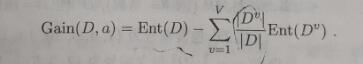

creamos la funcion chooseBestFeatures, que elige mejor camino

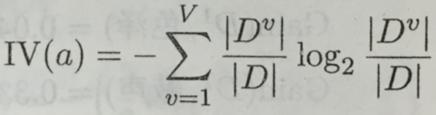

entre ellos el dato de en el conjuto de datos actual 

In [ ]:
def chooseBestFeatures(dataSet):
         numFeatures = len(dataSet[0])-1
         ent = calcShannonEnt(dataSet)
         bestGain = 1.1;
         bestFeatureID = -1
         infogain = 0.0;
         for i in range(numFeatures):
           list1 = [line[i] for line in dataSet]
           uniqueValues=set(list1)
           newEnt = 0.0 # Conditional entropy
           s = 0.0
           for value in uniqueValues:
             
              subDataSet = splitDataSet(dataSet,1,0)
              prob = len(subDataSet)/float(len(dataSet))
              newEnt += prob * calcShannonEnt(subDataSet)
              try:
                s -= prob * log(prob, 2);
              except (ValueError, TypeError):
                print("error_math 1-->0")
              print ('Informacion entropia:' + str (ent))
              print ('puerto ' + str (i) + 'Entropia condicional:' + str (newEnt))
              gain = ent - newEnt
              print ('puerto ' + str (i) + 'ganancia de información de la columna es:' + str (gain))
              infogain = gain / s # Find column info gain ratio
              print ('puerto ' + str (i) + 'Relación de ganancia de información de la columna' + str (infogain))
              if (infogain > bestGain):
                bestGain = infogain
                bestFeatureID = i
         return bestFeatureID

In [ ]:
datosb=X_scale.astype(int)
index = chooseBestFeatures(datosb)
print(index)

Informacion entropia:0.06643856189774724
puerto 0Entropia condicional:0.05754887502163469
puerto 0ganancia de información de la columna es:0.008889686876112551
puerto 0Relación de ganancia de información de la columna0.018518518518518497
Informacion entropia:0.06643856189774724
puerto 0Entropia condicional:0.11509775004326939
puerto 0ganancia de información de la columna es:-0.04865918814552214
puerto 0Relación de ganancia de información de la columna-0.05068210440517651
Informacion entropia:0.06643856189774724
puerto 1Entropia condicional:0.05754887502163469
puerto 1ganancia de información de la columna es:0.008889686876112551
puerto 1Relación de ganancia de información de la columna0.018518518518518497
Informacion entropia:0.06643856189774724
puerto 1Entropia condicional:0.11509775004326939
puerto 1ganancia de información de la columna es:-0.04865918814552214
puerto 1Relación de ganancia de información de la columna-0.05068210440517651
Informacion entropia:0.06643856189774724
puerto 

In [ ]:
def classNum( classList ):
  classCount = {}
  for label in classList:
    classCount[label] = classCount.get(label,0) + 1
    sortedClassCount = sorted( classCount.items(),key=operator.itemgetter(1),reverse=True )
    print( sortedClassCount )
    return sortedClassCount[0][0]

In [ ]:
def createTree(dataSet,labels,depth=0,max_f=None,max_depth=None):
  classList = [example[-1] for example in dataSet]  # ['yes','yes','yes','no','no','no','yes','no']
  if classList.count(classList[0]) == len(classList):
    return classList[0]  
  if max_f == None:
    max_f = 1
  if len( dataSet[0] )<=max_f:
    return classNum (classList) # Devuelve la etiqueta con más cantidad
  if max_depth!=None:
    if depth>=max_depth:
      return classNum(classList)
  depth = depth + 1
  bestFeat = chooseBestFeatures(dataSet)    # bestFeat: 0      bestFeat: 0
  bestFeatLabel = labels[bestFeat]
  myTree = {bestFeatLabel: {}} # La mejor característica seleccionada en el conjunto de datos actual se almacena en bestFeat
  del (labels [bestFeat]) # eliminar las funciones que se han seleccionado en este momento etiquetas = ['hay un auto']
  featValues = [example[bestFeat] for example in dataSet]
  uniqueVals = set(featValues)   # [1,0]
  for value in uniqueVals:
    subLabels = labels[:]
    temp = splitDataSet( dataSet,1,0)
    myTree[bestFeatLabel][value] = createTree(temp,subLabels,depth=depth,max_f=max_f,max_depth=max_depth)
  return myTree

In [ ]:
datosa=list(dataset.columns.values)
datosb=X_scale.astype(int)
createTree(X,datosa,1,3,3)

Informacion entropia:0.06643856189774724
puerto 0Entropia condicional:0.05754887502163469
puerto 0ganancia de información de la columna es:0.008889686876112551
puerto 0Relación de ganancia de información de la columna0.018518518518518497
Informacion entropia:0.06643856189774724
puerto 0Entropia condicional:0.11509775004326939
puerto 0ganancia de información de la columna es:-0.04865918814552214
puerto 0Relación de ganancia de información de la columna-0.05068210440517651
Informacion entropia:0.06643856189774724
puerto 1Entropia condicional:0.05754887502163469
puerto 1ganancia de información de la columna es:0.008889686876112551
puerto 1Relación de ganancia de información de la columna0.018518518518518497
Informacion entropia:0.06643856189774724
puerto 1Entropia condicional:0.11509775004326939
puerto 1ganancia de información de la columna es:-0.04865918814552214
puerto 1Relación de ganancia de información de la columna-0.05068210440517651
Informacion entropia:0.06643856189774724
puerto 

{'clase': {False: {'a9': {0: 1, 1: 1, 2: 1}},
  True: {'a9': {0: 1, 1: 1, 2: 1}}}}

**El árbol de decisión se clasifica dos veces, la primera vez se divide entre "si es falso" y la segunda vez se divide entre "si es verdad"**